<a href="https://colab.research.google.com/github/denverkim/DeepLearning/blob/main/snui_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /content/cats_and_dogs_filtered.zip #저장이름

--2025-07-31 11:11:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M  20.4MB/s    in 4.0s    

2025-07-31 11:11:32 (16.3 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [10]:
# 압축풀기
import os
import zipfile

local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
# 파일 이름 출력
import os
os.listdir('cats_and_dogs_filtered/train/cats')

['cat.331.jpg',
 'cat.291.jpg',
 'cat.558.jpg',
 'cat.396.jpg',
 'cat.512.jpg',
 'cat.990.jpg',
 'cat.566.jpg',
 'cat.162.jpg',
 'cat.1.jpg',
 'cat.177.jpg',
 'cat.577.jpg',
 'cat.887.jpg',
 'cat.306.jpg',
 'cat.758.jpg',
 'cat.884.jpg',
 'cat.878.jpg',
 'cat.765.jpg',
 'cat.309.jpg',
 'cat.459.jpg',
 'cat.3.jpg',
 'cat.585.jpg',
 'cat.169.jpg',
 'cat.408.jpg',
 'cat.449.jpg',
 'cat.944.jpg',
 'cat.764.jpg',
 'cat.720.jpg',
 'cat.631.jpg',
 'cat.402.jpg',
 'cat.742.jpg',
 'cat.11.jpg',
 'cat.188.jpg',
 'cat.217.jpg',
 'cat.929.jpg',
 'cat.786.jpg',
 'cat.886.jpg',
 'cat.470.jpg',
 'cat.594.jpg',
 'cat.529.jpg',
 'cat.668.jpg',
 'cat.624.jpg',
 'cat.948.jpg',
 'cat.202.jpg',
 'cat.889.jpg',
 'cat.267.jpg',
 'cat.733.jpg',
 'cat.792.jpg',
 'cat.920.jpg',
 'cat.771.jpg',
 'cat.187.jpg',
 'cat.219.jpg',
 'cat.856.jpg',
 'cat.734.jpg',
 'cat.275.jpg',
 'cat.603.jpg',
 'cat.269.jpg',
 'cat.702.jpg',
 'cat.89.jpg',
 'cat.610.jpg',
 'cat.329.jpg',
 'cat.564.jpg',
 'cat.67.jpg',
 'cat.43.jpg',


In [12]:
# 데이터 갯수
len(os.listdir('cats_and_dogs_filtered/train/cats'))

1000

In [13]:
# 패쓰 이름 만들기
train_cat_dir = '/content/cats_and_dogs_filtered/train/cats'
train_dog_dir = '/content/cats_and_dogs_filtered/train/dogs'
val_cat_dir = '/content/cats_and_dogs_filtered/validation/cats'
val_dog_dir = '/content/cats_and_dogs_filtered/validation/dogs'

In [15]:
# 이미지 한개씩 열 때

from PIL import Image
Image.open('/content/cats_and_dogs_filtered/train/cats/cat.0.jpg').size

(500, 374)

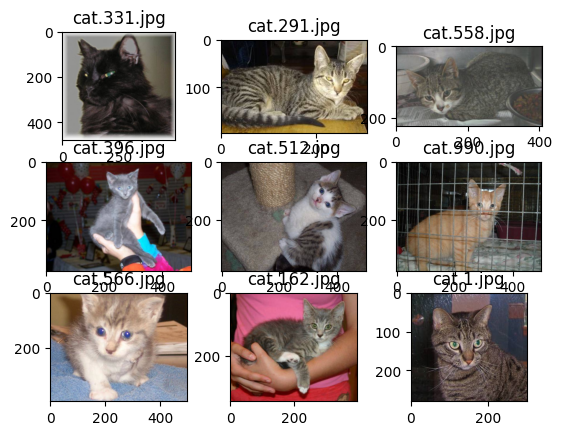

In [16]:
# 고양이 훈련 데이터 9개 시각화
import matplotlib.pyplot as plt
from PIL import Image

for i in range(9):
    f = os.path.join(train_cat_dir, os.listdir(train_cat_dir)[i])
    plt.subplot(3,3,i+1)
    plt.title(os.listdir(train_cat_dir)[i])
    plt.imshow(Image.open(f))

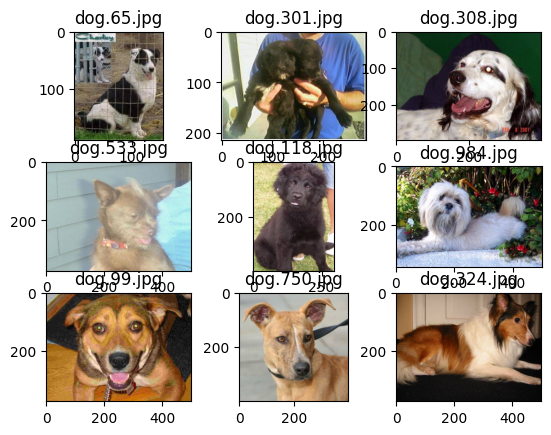

In [17]:
# 강아지 훈련데이터 시각화
for i in range(9):
    f = os.path.join(train_dog_dir, os.listdir(train_dog_dir)[i])
    plt.subplot(3,3,i+1)
    plt.title(os.listdir(train_dog_dir)[i])
    plt.imshow(Image.open(f))

In [18]:
# 이미지 증강 설정
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1.0/255., # 픽셀값 스케일 범위 [0,1]
    rotation_range=40, # 40 도까지 임의 회전
    width_shift_range=0.2, # 수평이동
    height_shift_range=0.2, # 수직이동
    shear_range=0.2, # 전단변환
    zoom_range=0.2, # 20%까지 임의 확대
    horizontal_flip=True) #수평플립

test_datagen = ImageDataGenerator(
    rescale = 1.0/255.) # 정규화

In [19]:
train_datagen
test_datagen

In [20]:
train_dir = '/content/cats_and_dogs_filtered/train'
validation_dir = '/content/cats_and_dogs_filtered/validation'

In [21]:
train_flow = train_datagen.flow_from_directory(
    train_dir, #훈련이미지가 있는 폴더
    target_size=(150,150), #이미지 사이즈 변경
    class_mode='binary' #이진 레이블
)
test_flow = test_datagen.flow_from_directory(
    validation_dir, #검증이미지가 있는 폴더
    target_size=(150,150), #이미지 사이즈 변경
    class_mode='binary' #이진 레이블
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
# CNN 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# 체크 포인트, 조기 종료 설정
from keras.callbacks import ModelCheckpoint, EarlyStopping

save_file_name = 'cats_and_dogs_cnn_model.h5'
checkpoint = ModelCheckpoint(save_file_name, monitor='val_accuracy',
                             verbose=1, save_best_only=True, mode='auto')

earlystopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [25]:
# 모델 학습
history = model.fit(train_flow, epochs=30, validation_data=test_flow, verbose=2, callbacks=[checkpoint, earlystopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.50100, saving model to cats_and_dogs_cnn_model.h5


63/63 - 28s - 450ms/step - accuracy: 0.5075 - loss: 0.6941 - val_accuracy: 0.5010 - val_loss: 0.6782
Epoch 2/30

Epoch 2: val_accuracy did not improve from 0.50100
63/63 - 16s - 260ms/step - accuracy: 0.4925 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/30

Epoch 3: val_accuracy did not improve from 0.50100
63/63 - 16s - 258ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/30

Epoch 4: val_accuracy did not improve from 0.50100
63/63 - 15s - 238ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/30

Epoch 5: val_accuracy did not improve from 0.50100
63/63 - 15s - 237ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/30

Epoch 6: val_accuracy did not improve from 0.50100
63/63 - 15s - 238ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [26]:
# 평가
model.evaluate(test_flow)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5000 - loss: 0.6932


[0.6931518912315369, 0.5]

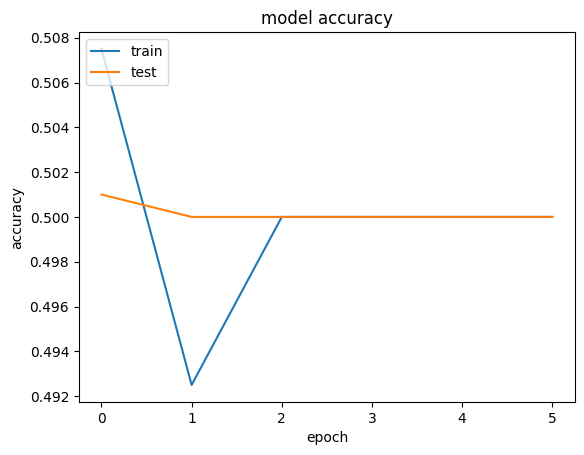

In [30]:
# 히스토리 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

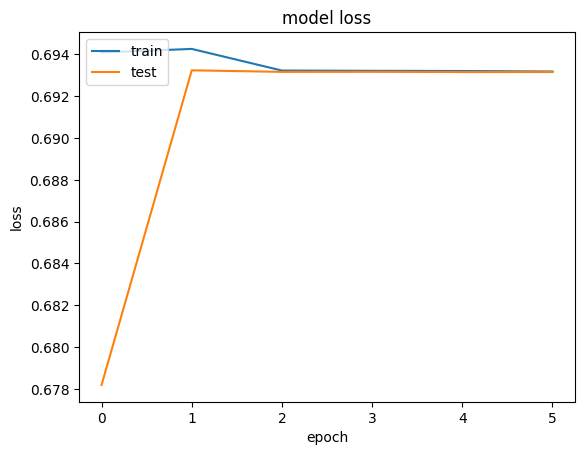

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

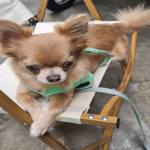

In [35]:
# 테스트 데이터
ch = Image.open('/content/chihuahua.jpg')

In [ ]:
# 사이즈 변경
ch = ch.resize((150,150))
ch

array([[[228, 228, 230],
        [228, 228, 230],
        [226, 226, 227],
        ...,
        [ 37,  35,  31],
        [ 34,  32,  29],
        [ 36,  32,  29]],

       [[226, 226, 227],
        [223, 223, 224],
        [219, 220, 220],
        ...,
        [ 38,  35,  31],
        [ 37,  33,  30],
        [ 33,  31,  27]],

       [[217, 217, 216],
        [213, 212, 213],
        [207, 206, 205],
        ...,
        [ 40,  36,  33],
        [ 37,  33,  30],
        [ 34,  32,  28]],

       ...,

       [[138, 129, 121],
        [139, 130, 121],
        [150, 142, 132],
        ...,
        [146, 160, 175],
        [153, 166, 182],
        [158, 171, 187]],

       [[141, 132, 123],
        [152, 143, 134],
        [157, 149, 138],
        ...,
        [149, 162, 177],
        [157, 171, 187],
        [161, 174, 191]],

       [[146, 137, 128],
        [160, 151, 142],
        [153, 145, 134],
        ...,
        [144, 156, 167],
        [158, 173, 189],
        [162, 177, 193]]], dtype=uint8)
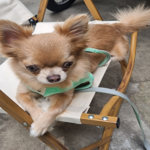

In [36]:
# 배열로 변경
ch = np.array(ch)
ch

In [37]:
ch.shape

(150, 150, 3)

In [40]:
ch = ch.reshape(1,150,150,3)
ch.shape

(1, 150, 150, 3)

In [49]:
# 예측
if model.predict(ch)[0] [0] > .5:
    print('강아지')
else:
    print('고양이')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
강아지


# 사전학습 모델

In [50]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


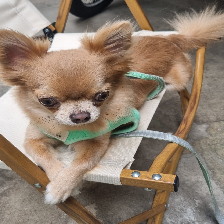

In [64]:
img_path = '/content/chihuahua.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
img

In [65]:
x = keras.utils.img_to_array(img)
x

array([[[229., 229., 231.],
        [229., 229., 231.],
        [228., 228., 230.],
        ...,
        [ 38.,  37.,  33.],
        [ 39.,  38.,  34.],
        [ 41.,  37.,  34.]],

       [[232., 232., 234.],
        [227., 227., 229.],
        [226., 226., 228.],
        ...,
        [ 33.,  29.,  26.],
        [ 34.,  30.,  27.],
        [ 32.,  31.,  27.]],

       [[225., 225., 227.],
        [223., 223., 223.],
        [224., 224., 224.],
        ...,
        [ 40.,  35.,  32.],
        [ 37.,  33.,  30.],
        [ 30.,  29.,  25.]],

       ...,

       [[141., 132., 123.],
        [149., 140., 131.],
        [149., 140., 131.],
        ...,
        [161., 174., 191.],
        [159., 172., 189.],
        [167., 180., 197.]],

       [[146., 137., 128.],
        [150., 141., 132.],
        [156., 147., 138.],
        ...,
        [163., 176., 193.],
        [157., 173., 189.],
        [165., 181., 197.]],

       [[148., 139., 130.],
        [158., 149., 140.],
        [162., 1

In [66]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [67]:
x = preprocess_input(x)
x

array([[[[127.061   , 112.221   , 105.32    ],
         [127.061   , 112.221   , 105.32    ],
         [126.061   , 111.221   , 104.32    ],
         ...,
         [-70.939   , -79.779   , -85.68    ],
         [-69.939   , -78.779   , -84.68    ],
         [-69.939   , -79.779   , -82.68    ]],

        [[130.061   , 115.221   , 108.32    ],
         [125.061   , 110.221   , 103.32    ],
         [124.061   , 109.221   , 102.32    ],
         ...,
         [-77.939   , -87.779   , -90.68    ],
         [-76.939   , -86.779   , -89.68    ],
         [-76.939   , -85.779   , -91.68    ]],

        [[123.061   , 108.221   , 101.32    ],
         [119.061   , 106.221   ,  99.32    ],
         [120.061   , 107.221   , 100.32    ],
         ...,
         [-71.939   , -81.779   , -83.68    ],
         [-73.939   , -83.779   , -86.68    ],
         [-78.939   , -87.779   , -93.68    ]],

        ...,

        [[ 19.060997,  15.221001,  17.32    ],
         [ 27.060997,  23.221   ,  25.32    ]

In [68]:
preds = model.predict(x)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[1.51912760e-09, 2.91747622e-08, 2.19699086e-08, 1.48307422e-09,
        1.30465665e-08, 1.53269699e-08, 2.18454610e-09, 7.20351778e-08,
        1.57231440e-07, 1.95752801e-08, 4.29953673e-09, 2.10331219e-08,
        3.74257647e-09, 3.68122377e-09, 1.37921929e-09, 1.07824860e-07,
        1.12534531e-06, 7.06616675e-07, 2.22904024e-08, 2.18598402e-07,
        3.62657882e-09, 1.66218204e-08, 8.48243281e-11, 1.38026488e-08,
        6.15658147e-09, 1.66586034e-08, 1.37504896e-08, 5.78942316e-09,
        2.27259989e-09, 1.42622376e-08, 1.98990637e-08, 1.45343853e-08,
        1.45846748e-08, 1.20394750e-09, 5.15509591e-09, 2.50926591e-09,
        4.41857466e-08, 4.28999325e-09, 2.67063758e-08, 5.17426848e-08,
        2.88656281e-08, 2.80625532e-08, 3.88774879e-08, 7.98993369e-08,
        8.43285175e-09, 5.26864552e-09, 5.88980065e-08, 1.20971137e-07,
        2.89165691e-10, 2.23956120e-09, 1.56338123e-10, 1.49044510e-08,
        5.81436943e-08, 2.92662197e-08, 9.41261931e-08, 4.473493

In [69]:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02085620', 'Chihuahua', np.float32(0.7145304)), ('n02112018', 'Pomeranian', np.float32(0.2517781)), ('n02086079', 'Pekinese', np.float32(0.012230022))]
